In [25]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Estefania Zapata Valderrama
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [ ]:
import numpy as np

In [4]:
def five_point_derivative(f, x, h):
    """
    Calcula la derivada de cinco puntos para una función f en un conjunto de puntos x con paso h.
    Parámetros:
    - f: función a derivar.
    - x: array de puntos donde evaluar la derivada.
    - h: paso entre puntos en el array x.

    Retorna:
    - Array de las derivadas aproximadas en cada punto de x usando fórmulas de 5 puntos.
    """
    n = len(x) #numero de puntos
    fprime = np.zeros_like(x) #array para las derivadas

    for i in range(n):
        if i<4:
            # derivada adelantada
            fprime[i] = (-25 * f(x[i]) + 48 * f(x[i + 1]) - 36 * f(x[i + 2]) +
                         16 * f(x[i + 3]) - 3 * f(x[i + 4])) / (12 * h)
        elif i>n-5:
            #deribada atrasada
            fprime[i] = (25 * f(x[i]) - 48 * f(x[i - 1]) + 36 * f(x[i - 2]) -
                         16 * f(x[i - 3]) + 3 * f(x[i - 4])) / (12 * h)
        else:
            # Derivada centrada
            fprime[i] = (f(x[i - 2]) - 8 * f(x[i - 1]) + 8 * f(x[i + 1]) - f(x[i + 2])) / (12 * h)

    return fprime


In [7]:
f = lambda x: np.cos(x) #funcion
df = lambda x: -np.sin(x) #derivada exacta

x = np.linspace(0, 2*np.pi, 10)
h = x[1] - x[0]

fprima = five_point_derivative(f, x, h)
x0 = np.pi / 8


aproximado = np.interp(x0, x, fprima) # Interpolar derivada aproximada en x0 porque la funcion five_point_derivative me da un array
exacto = df(x0)
error = abs(aproximado - exacto)

print(f"Aproximación en x0 = {x0:.4f}: {aproximado:.4f}")
print(f"Valor exacto:                {exacto:.4f}")
print(f"Error absoluto:              {error:.2e}")


Aproximación en x0 = 0.3927: -0.3202
Valor exacto:                -0.3827
Error absoluto:              6.25e-02


El parámetro h representa el paso entre puntos al calcular derivadas numéricamente. En general:

Al reducir h (hacerlo más pequeño), la aproximación de la derivada mejora, porque estamos usando puntos más cercanos y la fórmula se ajusta mejor a la forma real de la función.

Sin embargo, si h se vuelve demasiado pequeño, el error de redondeo de la computadora (por usar decimales con precisión limitada) empieza a afectar, y entonces el error total puede aumentar en lugar de disminuir.

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

# Nota:
no pude utilizar scipy.derivative, me dice que en Python 3 esa función fue eliminada de scipy.misc en versiones recientes de SciPy (desde SciPy 1.10, más o menos).
Entonces voy a comparar con este que encontre llamado numdifftools.

In [8]:
pip install numdifftools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 8.2 MB/s eta 0:00:00


In [13]:
import numdifftools as nd
import numpy as np
import matplotlib.pyplot as plt
from numdifftools import Derivative

In [14]:
def forward_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita hacia adelante.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x + h) - f(x)) / h

def backward_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita hacia atrás.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x) - f(x - h)) / h

def centered_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita centrada.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x + h) - f(x - h)) / (2 * h)

In [15]:
def Diferencias_Finitas(f, h):
  '''
  Calcula la primera derivada de f usando las diferencias finitas.
  f: función
  h: paso de discretización
  return: primera derivada de f usando las diferencias finitas (función)
  '''
  def Derivada(x):
    '''
    Calcula la primera derivada de f en x usando las diferencias finitas.
    x: punto en el que se quiere calcular la derivada
    return: primera derivada de f en x
    '''
    n = len(x)
    fprime = np.zeros_like(x, dtype=float) # Crea un array para guardar los datos
    for i in range(n):
      if i == 0: # Condicion para el primer punto
        fprime[i] = forward_diff(f, x[i], h)
      elif i == n-1: # Condición para el último punto
        fprime[i] = backward_diff(f, x[i], h)
      else:
        fprime[i] = centered_diff(f, x[i], h) # Diferencias centradas
    return fprime

  return Derivada

In [17]:
def f(x):
    return x * np.exp(x)

def diferencias_finitas(f, x, h): # derivada de primer orden
    return (f(x + h) - f(x - h)) / (2 * h)

def second_diff(f, x, h): #derivada de segundo orden
    return (f(x + h) - 2*f(x) + f(x - h)) / (h ** 2)

x0 = 2.0
h_values = np.linspace(0.01, 0.1, 10)

# errores
error_fd_1 = []
error_np_1 = []
error_fd_2 = []
error_np_2 = []

# Derivadas con numdifftools
d1_exact = Derivative(f, n=1)(x0)
d2_exact = Derivative(f, n=2)(x0)

for h in h_values:
    x = np.linspace(1.8, 2.2, 6)
    y = f(x)

    # Derivadas con diferencias finitas centradas
    d1_fd = diferencias_finitas(f, x0, h)
    d2_fd = second_diff(f, x0, h)

    # Derivadas con np.gradient (en el punto más cercano a x=2.0)
    dy_dx = np.gradient(y, x)
    d2y_dx2 = np.gradient(dy_dx, x)
    idx = np.argmin(np.abs(x - x0))

    d1_np = dy_dx[idx]
    d2_np = d2y_dx2[idx]

    # Errores
    error_fd_1.append(np.abs(d1_fd - d1_exact))
    error_np_1.append(np.abs(d1_fd - d1_np ))
    error_fd_2.append(np.abs(d2_fd - d2_exact))
    error_np_2.append(np.abs(d2_fd - d2_np))



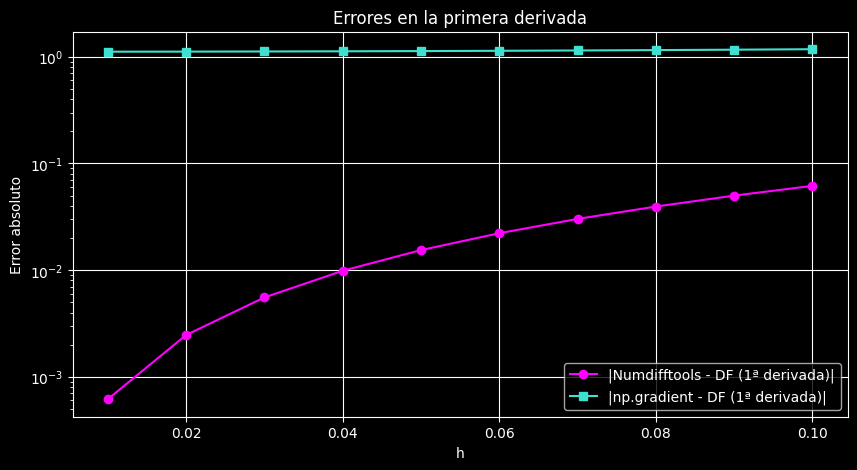

In [23]:
# Gráfica de errores de la primera derivada
plt.figure(figsize=(10, 5))
plt.style.use('dark_background')
plt.plot(h_values, error_fd_1, label='|Numdifftools - DF (1ª derivada)|', marker='o', color='magenta')
plt.plot(h_values, error_np_1, label='|np.gradient - DF (1ª derivada)|', marker='s', color ='turquoise')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error absoluto')
plt.title('Errores en la primera derivada')
plt.legend()
plt.grid(True)
plt.show()


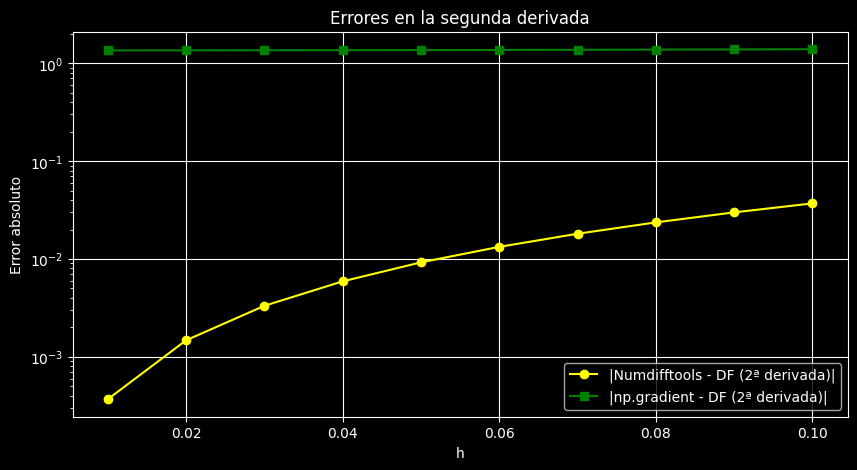

In [24]:

# Gráfica de errores de la segunda derivada
plt.figure(figsize=(10, 5))
plt.style.use('dark_background')
plt.plot(h_values, error_fd_2, label='|Numdifftools - DF (2ª derivada)|', marker='o', color='yellow')
plt.plot(h_values, error_np_2, label='|np.gradient - DF (2ª derivada)|', marker='s', color='green')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error absoluto')
plt.title('Errores en la segunda derivada')
plt.legend()
plt.grid(True)
plt.show()